# Llama-3.2-11B-Vision Key-Value Extraction

**Purpose:** Comprehensive evaluation pipeline for Llama-3.2-11B-Vision-Instruct model using modular architecture with professional inline visualization

## Key Features
- **Modular Design:** Imports functionality from `common/` modules instead of embedded code
- **Detailed Processing:** Advanced reasoning capabilities for complex document analysis
- **Comprehensive Extraction:** Rich, detailed responses with built-in preprocessing
- **Robust Performance:** Excellent accuracy across varied document types
- **Professional Visualization Suite:** Generate business-grade charts with immediate inline display
- **Stakeholder Ready:** HTML reports with embedded visualizations for presentations

## Architecture Overview
This notebook leverages the established modular architecture:
- **`common.config`** - Centralized configuration and field definitions
- **`common.evaluation_utils`** - Image discovery, parsing, and evaluation functions
- **`common.reporting`** - Report generation and analysis utilities  
- **`models.llama_processor`** - Llama-3.2-Vision-specific model processing class
- **`common.visualizations`** - Professional visualization suite with business intelligence

## Model Characteristics
- **Model:** Llama-3.2-11B-Vision-Instruct (11 billion parameters)
- **Memory:** ~22GB VRAM requirement (comprehensive processing)
- **Speed:** Variable processing time depending on document complexity
- **Architecture:** Advanced vision-language model with conversation handling
- **Strengths:** Detailed extraction, robust reasoning, built-in preprocessing, conversation artifact cleaning

In [1]:
# ============================================================================
# IMPORTS FROM MODULAR ARCHITECTURE
# ============================================================================

import sys
import warnings
from datetime import datetime
from pathlib import Path

# Add parent directory to Python path to import common modules
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import shared configuration and utilities
from common.config import (
    DATA_DIR,
    EXTRACTION_FIELDS,
    FIELD_COUNT,
    GROUND_TRUTH_PATH,
    LLAMA_MODEL_PATH,
    OUTPUT_DIR,
    show_current_config,
)
from common.evaluation_utils import (
    create_extraction_dataframe,
    discover_images,
    evaluate_extraction_results,
    load_ground_truth,
)
from common.reporting import generate_comprehensive_reports, print_evaluation_summary

# Import Llama-specific processor
from models.llama_processor import LlamaProcessor

# Configure environment
warnings.filterwarnings("ignore")

print("🦙 Llama-3.2-11B-Vision Key-Value Extraction (Modular Version)")
print("✅ All modules imported successfully")
print(f"📋 Configured for {FIELD_COUNT} extraction fields")
print("🔧 Ready to process documents with Llama-3.2-11B-Vision-Instruct")
print("🧠 Advanced reasoning and detailed extraction capabilities")

🦙 Llama-3.2-11B-Vision Key-Value Extraction (Modular Version)
✅ All modules imported successfully
📋 Configured for 25 extraction fields
🔧 Ready to process documents with Llama-3.2-11B-Vision-Instruct
🧠 Advanced reasoning and detailed extraction capabilities


In [2]:
# ============================================================================
# CONFIGURATION VALIDATION AND SETUP
# ============================================================================

# Display current configuration from common.config
print("🔧 CONFIGURATION VALIDATION")
print("=" * 50)
show_current_config()

# Ensure output directory exists
output_dir_path = Path(OUTPUT_DIR)
output_dir_path.mkdir(parents=True, exist_ok=True)

# Validate critical paths
print("\n📁 PATH VALIDATION")
print(f"✅ Data directory: {DATA_DIR}")
print(f"✅ Llama model path: {LLAMA_MODEL_PATH}")
print(f"✅ Ground truth: {GROUND_TRUTH_PATH}")
print(f"✅ Output directory: {OUTPUT_DIR}")

# Show extraction fields configuration
print("\n📋 EXTRACTION CONFIGURATION")
print(f"📊 Total fields: {FIELD_COUNT}")
print(f"🔍 Sample fields: {', '.join(EXTRACTION_FIELDS[:5])}...")

# Llama-specific information
print("\n🦙 LLAMA-3.2-VISION SPECIFICATIONS")
print("⚡ Model: Llama-3.2-11B-Vision-Instruct (11 billion parameters)")
print("🚀 Processing: Variable speed depending on document complexity")
print("🎯 Optimized for detailed document analysis with advanced reasoning")
print("📋 Built-in conversation handling and preprocessing")
print("🧠 Comprehensive vision-language processing capabilities")

🔧 CONFIGURATION VALIDATION
🔧 Current Configuration:
   Deployment: AISandbox
   InternVL3 Model: InternVL3-8B
   Llama Model: Llama-3.2-11B-Vision-Instruct
   Models Base: /home/jovyan/nfs_share/models
   Data Dir: /home/jovyan/nfs_share/tod/LMM_POC/evaluation_data
   Output Dir: /home/jovyan/nfs_share/tod/output
   InternVL3 Path: /home/jovyan/nfs_share/models/InternVL3-8B
   Llama Path: /home/jovyan/nfs_share/models/Llama-3.2-11B-Vision-Instruct

📁 PATH VALIDATION
✅ Data directory: /home/jovyan/nfs_share/tod/LMM_POC/evaluation_data
✅ Llama model path: /home/jovyan/nfs_share/models/Llama-3.2-11B-Vision-Instruct
✅ Ground truth: /home/jovyan/nfs_share/tod/LMM_POC/evaluation_data/evaluation_ground_truth.csv
✅ Output directory: /home/jovyan/nfs_share/tod/output

📋 EXTRACTION CONFIGURATION
📊 Total fields: 25
🔍 Sample fields: ABN, ACCOUNT_HOLDER, BANK_ACCOUNT_NUMBER, BANK_NAME, BSB_NUMBER...

🦙 LLAMA-3.2-VISION SPECIFICATIONS
⚡ Model: Llama-3.2-11B-Vision-Instruct (11 billion parameters)
🚀 

In [3]:
# ============================================================================
# MODEL INITIALIZATION USING LLAMA PROCESSOR
# ============================================================================

print("🚀 INITIALIZING LLAMA VISION PROCESSOR")
print("=" * 50)

# Initialize LlamaProcessor with automatic configuration
# The processor handles model loading, quantization, and batch size optimization
processor = LlamaProcessor(
    model_path=LLAMA_MODEL_PATH,
    device="cuda",  # Will fallback to CPU if CUDA unavailable
    batch_size=None,  # Auto-detect optimal batch size based on GPU memory
)

print("\n✅ LlamaProcessor initialized successfully")
print(f"🔧 Model loaded from: {LLAMA_MODEL_PATH}")
print(f"⚡ Extraction prompt configured for {FIELD_COUNT} fields")
print("🎯 Ready for batch document processing")

# Display extraction prompt (first few lines for verification)
extraction_prompt = processor.get_extraction_prompt()
prompt_lines = extraction_prompt.split("\n")
print("\n📝 Extraction Prompt Preview:")
for i, line in enumerate(prompt_lines, 1):
    if line.strip():
        print(f"   {i}: {line[:80]}..." if len(line) > 80 else f"   {i}: {line}")

# Show generation configuration (now properly using config.py)
print("\n⚙️ Generation Configuration:")
print(f"   Max new tokens: {processor.generation_config['max_new_tokens']}")
print(f"   Temperature: {processor.generation_config['temperature']}")
print(
    f"   Sampling: {'Enabled' if processor.generation_config['do_sample'] else 'Deterministic'}"
)
print(f"   Top-p: {processor.generation_config['top_p']}")
print(f"   Batch size: {processor.batch_size}")

print("🦙 Llama Vision Processor ready for comprehensive document extraction!")

🚀 INITIALIZING LLAMA VISION PROCESSOR
🤖 Auto-detected batch size: 3 (GPU Memory: 139.7GB)
🎯 Generation config: max_new_tokens=1000, temperature=0.1, do_sample=True
🔄 Loading Llama Vision model from: /home/jovyan/nfs_share/models/Llama-3.2-11B-Vision-Instruct


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

✅ Llama Vision model loaded successfully
🔧 Device: cuda:0
💾 Model parameters: 10,670,220,835
🚀 Basic V100 optimizations enabled

✅ LlamaProcessor initialized successfully
🔧 Model loaded from: /home/jovyan/nfs_share/models/Llama-3.2-11B-Vision-Instruct
⚡ Extraction prompt configured for 25 fields
🎯 Ready for batch document processing

📝 Extraction Prompt Preview:
   1: Extract key-value data from this business document image.
   3: CRITICAL INSTRUCTIONS:
   4: - Output ONLY the structured data below
   5: - Do NOT include any conversation text
   6: - Do NOT repeat the user's request
   7: - Do NOT include <image> tokens
   8: - Start immediately with ABN
   9: - Stop immediately after TOTAL
   11: REQUIRED OUTPUT FORMAT - EXACTLY 25 LINES:
   12: ABN: [11-digit Australian Business Number or N/A]
   13: ACCOUNT_HOLDER: [account holder name or N/A]
   14: BANK_ACCOUNT_NUMBER: [account number from bank statements only or N/A]
   15: BANK_NAME: [bank name from bank statements only or N/A]


In [4]:
# ============================================================================
# BATCH PROCESSING AND EVALUATION
# ============================================================================

print("📁 DOCUMENT DISCOVERY AND PROCESSING")
print("=" * 50)

# Discover images using shared utility
print(f"🔍 Discovering images in: {DATA_DIR}")
image_files = discover_images(DATA_DIR)

# Filter for test images (modify as needed)
image_files = [f for f in image_files if "synthetic_invoice" in Path(f).name]

print(f"📷 Found {len(image_files)} images for processing")

if not image_files:
    print("❌ No images found for processing")
else:
    # Process batch using LlamaProcessor
    print("\n🚀 Starting batch processing with LlamaProcessor...")
    print(f"⚡ Using optimized batch size: {processor.batch_size}")
    print("🧠 Comprehensive processing with advanced reasoning")

    extraction_results, batch_statistics = processor.process_image_batch(image_files)

    # Create structured DataFrames using shared utility
    print("\n📊 Creating extraction DataFrames...")
    main_df, metadata_df = create_extraction_dataframe(extraction_results)

    # Save extraction results
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    extraction_csv = output_dir_path / f"llama_batch_extraction_{timestamp}.csv"
    main_df.to_csv(extraction_csv, index=False)
    print(f"💾 Extraction results saved: {extraction_csv.name}")

    # Load ground truth for evaluation
    print(f"\n📊 Loading ground truth from: {GROUND_TRUTH_PATH}")
    ground_truth_data = load_ground_truth(GROUND_TRUTH_PATH)

    if ground_truth_data:
        # Perform comprehensive evaluation
        print("\n🎯 Performing evaluation against ground truth...")
        evaluation_summary = evaluate_extraction_results(
            extraction_results, ground_truth_data
        )

        if "error" not in evaluation_summary:
            # Print evaluation summary to console
            print_evaluation_summary(
                evaluation_summary, "Llama-3.2-11B-Vision-Instruct"
            )

            print("\n📊 EVALUATION METRICS:")
            print(f"   Overall Accuracy: {evaluation_summary['overall_accuracy']:.1%}")
            print(f"   Perfect Documents: {evaluation_summary['perfect_documents']}")
            print(
                f"   Best Performance: {evaluation_summary['best_performing_image']} ({evaluation_summary['best_performance_accuracy']:.1%})"
            )
            print(
                f"   Worst Performance: {evaluation_summary['worst_performing_image']} ({evaluation_summary['worst_performance_accuracy']:.1%})"
            )

            # Llama-specific performance highlights
            print("\n🦙 LLAMA-3.2-VISION PERFORMANCE HIGHLIGHTS:")
            print("   Detailed Processing: Comprehensive extraction responses")
            print(
                f"   Processing Speed: {batch_statistics['average_processing_time']:.2f}s avg per document"
            )
            print(f"   Success Rate: {batch_statistics['success_rate']:.1%}")
            print(
                f"   Effective Batch Size: {batch_statistics.get('effective_batch_size', 'N/A')}"
            )
        else:
            print(f"❌ Evaluation error: {evaluation_summary['error']}")
            evaluation_summary = None
    else:
        print("❌ No ground truth data available - skipping evaluation")
        evaluation_summary = None

📁 DOCUMENT DISCOVERY AND PROCESSING
🔍 Discovering images in: /home/jovyan/nfs_share/tod/LMM_POC/evaluation_data
📷 Found 20 images for processing

🚀 Starting batch processing with LlamaProcessor...
⚡ Using optimized batch size: 3
🧠 Comprehensive processing with advanced reasoning

🚀 Processing 20 images with Llama Vision (batch_size=3)...

[Batch 1] Processing images 1-3 of 20
   🔄 Processing 3 images with proven single-image method...
     ✅ synthetic_invoice_001.png: 17/25 fields (30.9s)
     ✅ synthetic_invoice_002.png: 17/25 fields (32.6s)
     ✅ synthetic_invoice_003.png: 17/25 fields (27.8s)
   ⏱️ Batch processing time: 91.30s (avg: 30.43s per image)

[Batch 2] Processing images 4-6 of 20
   🔄 Processing 3 images with proven single-image method...
     ✅ synthetic_invoice_004.png: 18/25 fields (29.6s)
     ✅ synthetic_invoice_005.png: 15/25 fields (29.3s)
     ✅ synthetic_invoice_006.png: 12/25 fields (31.4s)
   ⏱️ Batch processing time: 90.29s (avg: 30.09s per image)

[Batch 3] P

In [5]:
# ============================================================================
# COMPREHENSIVE REPORTING AND RESULTS SUMMARY
# ============================================================================

if "evaluation_summary" in locals() and evaluation_summary is not None:
    print("📋 GENERATING COMPREHENSIVE REPORTS")
    print("=" * 50)

    # Generate comprehensive reports using shared reporting utilities
    report_paths = generate_comprehensive_reports(
        evaluation_summary=evaluation_summary,
        output_dir_path=output_dir_path,
        model_name="llama",
        model_full_name="Llama-3.2-11B-Vision-Instruct",
        batch_statistics=batch_statistics,
        extraction_results=extraction_results,
        ground_truth_data=ground_truth_data,
    )

    print("\n📁 OUTPUT FILES GENERATED")
    print("=" * 30)
    print(f"📊 Extraction Results: {extraction_csv.name}")

    for report_type, report_path in report_paths.items():
        if isinstance(report_path, list):
            print(f"🎨 {report_type.title()}: {len(report_path)} files")
            for path in report_path[:3]:  # Show first 3 files
                print(f"   • {Path(path).name}")
            if len(report_path) > 3:
                print(f"   • ... and {len(report_path) - 3} more")
        else:
            print(
                f"📄 {report_type.replace('_', ' ').title()}: {Path(report_path).name}"
            )

    print("\n🎯 EVALUATION COMPLETED SUCCESSFULLY!")
    print(f"📁 All files saved to: {output_dir_path}")

    # Display key metrics summary
    print("\n📊 FINAL RESULTS SUMMARY")
    print("=" * 30)
    print(f"🎯 Overall Accuracy: {evaluation_summary['overall_accuracy']:.1%}")
    print(f"📷 Documents Processed: {evaluation_summary['total_images']}")
    print(f"⭐ Perfect Documents: {evaluation_summary['perfect_documents']}")
    print(f"📈 Success Rate: {batch_statistics['success_rate']:.1%}")
    print(f"⏱️  Avg Processing Time: {batch_statistics['average_processing_time']:.2f}s")

    # Llama-specific performance summary
    print("\n🦙 LLAMA-3.2-VISION PERFORMANCE SUMMARY")
    print("=" * 40)
    print("💾 Memory Usage: ~22GB VRAM (comprehensive processing)")
    print(
        f"⚡ Speed: {batch_statistics['average_processing_time']:.2f}s avg per document"
    )
    print(
        f"🚀 Batch Processing: {batch_statistics.get('effective_batch_size', 'N/A')} effective batch size"
    )
    print(
        "🎯 Model Architecture: Advanced vision-language model with conversation handling"
    )
    print(
        "📋 Processing Features: Built-in preprocessing and conversation artifact cleaning"
    )

    # Show deployment readiness
    if evaluation_summary["overall_accuracy"] >= 0.9:
        print("\n✅ MODEL IS PRODUCTION READY! (≥90% accuracy)")
    elif evaluation_summary["overall_accuracy"] >= 0.8:
        print("\n⚠️ MODEL IS PILOT READY (80-90% accuracy)")
    else:
        print("\n🔧 MODEL NEEDS OPTIMIZATION (<80% accuracy)")

    # Model comparison insight
    print("\n💡 DEPLOYMENT CONSIDERATION:")
    print("   Llama-3.2-11B-Vision offers detailed and comprehensive extraction")
    print("   responses with advanced reasoning capabilities. Consider this model")
    print("   for scenarios requiring detailed analysis and robust performance.")

else:
    print("⚠️ Evaluation summary not available - check previous cells for errors")

print("\n🎉 Llama Vision Modular Evaluation Complete!")
print("📋 Check the generated reports for detailed analysis and deployment guidance.")
print("🦙 Llama-3.2-11B-Vision: Comprehensive vision-language processing")

📋 GENERATING COMPREHENSIVE REPORTS
📊 Generating sklearn classification report...
📊 Generating sklearn classification report...
✅ Classification report saved: llama_classification_report_20250812_060821.md

🎨 Generating visualizations...
🎨 Generating complete visualization suite for llama...
🎨 Creating field accuracy chart for llama...
✅ Field accuracy chart saved: /home/jovyan/nfs_share/tod/output/llama_field_accuracy_bar_20250812_060821.png
🎨 Creating performance dashboard for llama...
✅ Performance dashboard saved: /home/jovyan/nfs_share/tod/output/llama_performance_dashboard_20250812_060821.png
🎨 Creating field category analysis for llama...
✅ Field category analysis saved: /home/jovyan/nfs_share/tod/output/field_category_analysis_20250812_060822.png
🎨 Creating classification metrics dashboard for llama...
✅ Classification metrics dashboard saved: /home/jovyan/nfs_share/tod/output/llama_classification_metrics_20250812_060822.png
✅ Generated 4 visualizations for llama
📄 Creating HTML

📊 GENERATING ANALYSIS CHARTS
📈 Creating analysis charts for model evaluation
📁 Charts will be saved to: /home/jovyan/nfs_share/tod/output



## 📊 Field Accuracy Results

**Extraction accuracy for each business document field**

📊 Analyzing field-level performance...


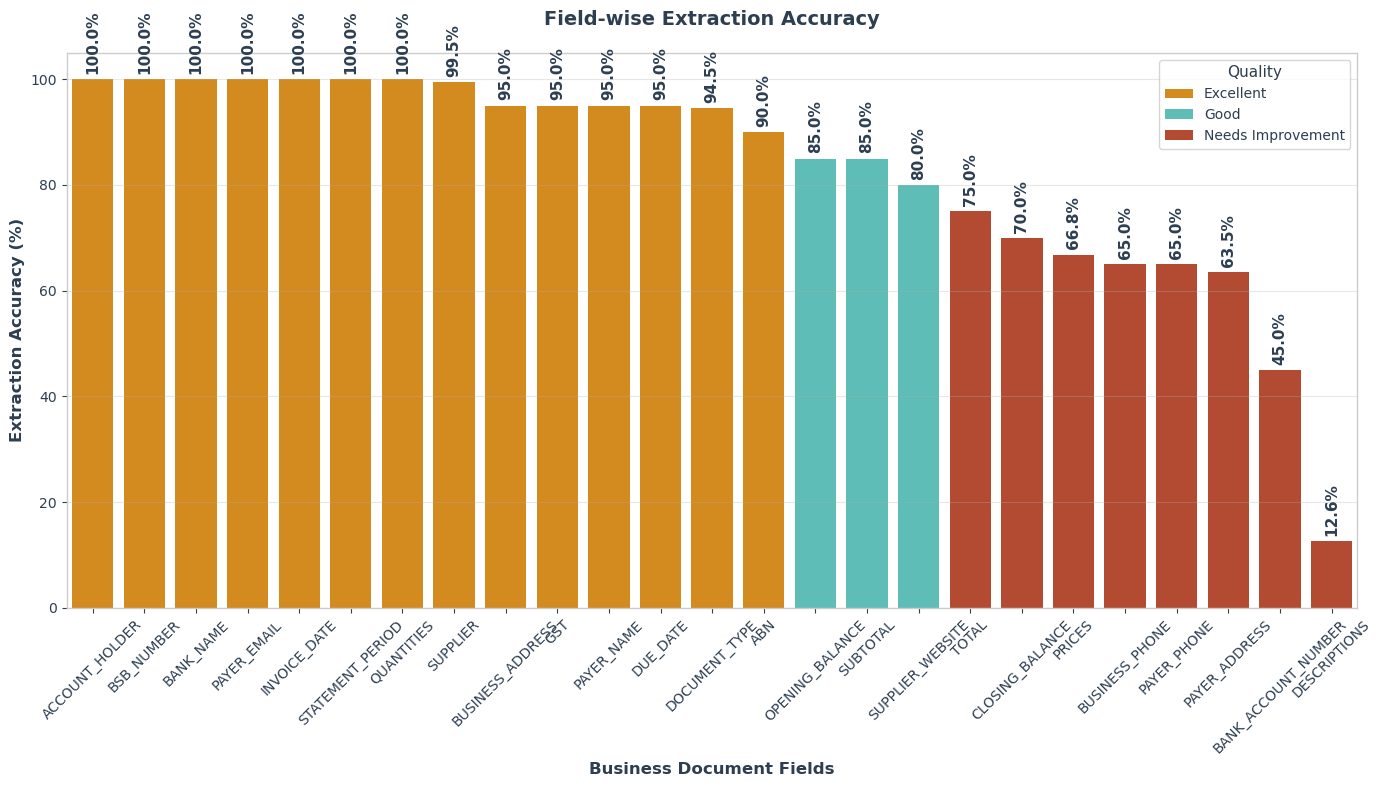

✅ Field accuracy chart saved: llama_field_accuracy_20250812_060823.png


## 📈 Performance Overview

**Model performance metrics and resource usage**


📈 Creating performance overview...


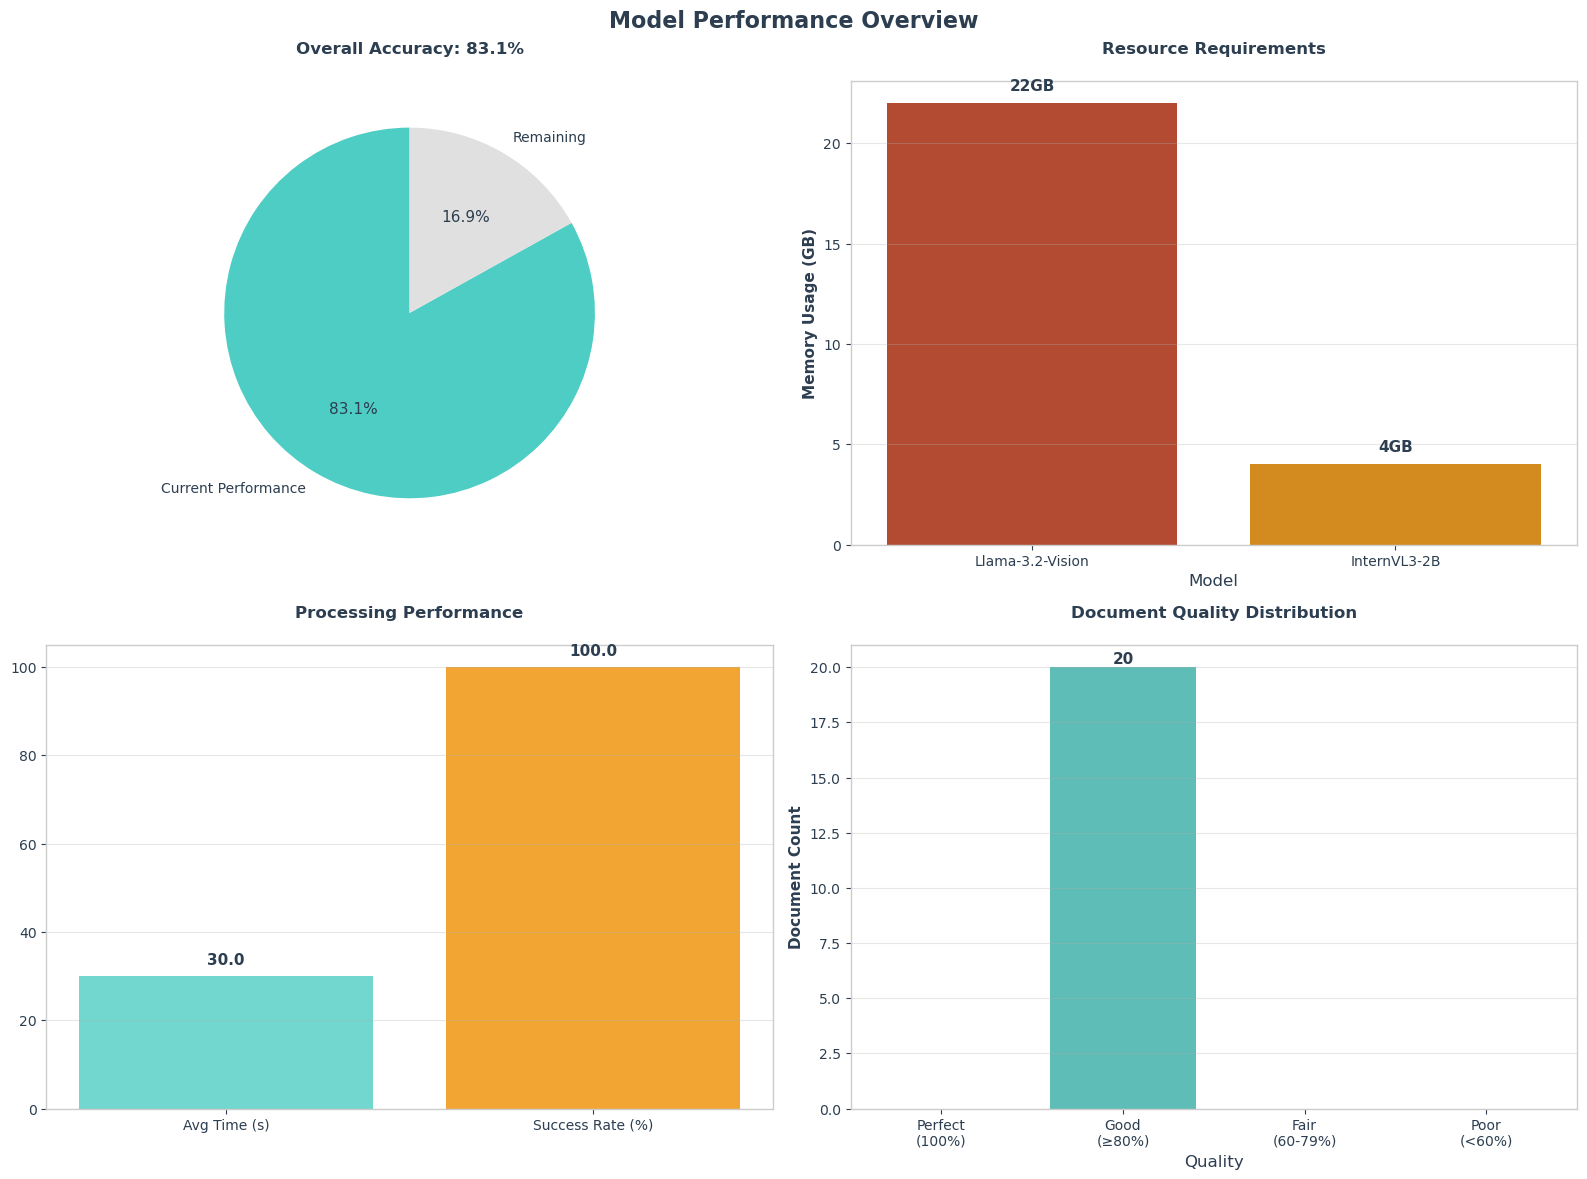

✅ Performance dashboard saved: llama_performance_dashboard_20250812_060823.png


## 🏢 Business Field Analysis

**Performance analysis by field importance**


💼 Analyzing business field categories...


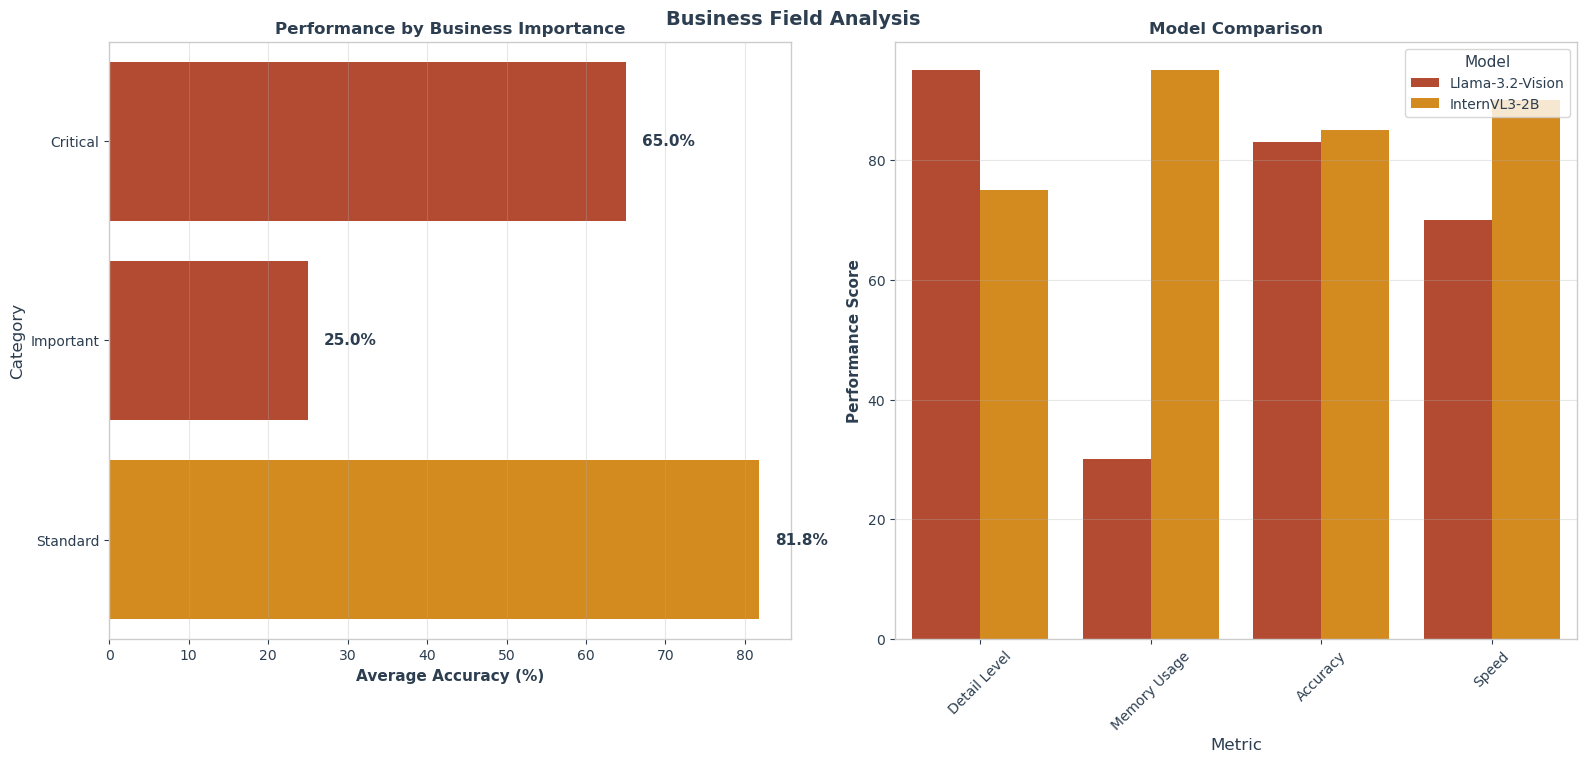

✅ Business analysis chart saved: llama_business_analysis_20250812_060823.png


## 🎯 Summary


📊 ANALYSIS SUMMARY
📊 Fields analyzed: 25
🎯 Overall Accuracy: 83.1%
⏱️ Average processing time: 30.0s per document


### ⚠️ **READY FOR PILOT**

🔍 Model suitable for pilot testing

📁 All charts saved to: /home/jovyan/nfs_share/tod/output

📊 Analysis complete!


In [6]:
# ============================================================================
# VISUALIZATION AND ANALYSIS
# ============================================================================

if "evaluation_summary" in locals() and evaluation_summary is not None:
    print("📊 GENERATING ANALYSIS CHARTS")
    print("=" * 40)

    # Import visualization modules
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from IPython.display import Markdown, display

    # Import visualization constants
    from common.config import VIZ_COLORS, VIZ_QUALITY_THRESHOLDS
    from common.visualizations import LMMVisualizer

    # Initialize visualizer
    visualizer = LMMVisualizer(output_dir=str(output_dir_path))

    # Set matplotlib for display
    %matplotlib inline

    print("📈 Creating analysis charts for model evaluation")
    print(f"📁 Charts will be saved to: {output_dir_path}\n")

    # =============================================================================
    # 1. FIELD ACCURACY ANALYSIS
    # =============================================================================

    display(Markdown("## 📊 Field Accuracy Results"))
    display(Markdown("**Extraction accuracy for each business document field**"))

    print("📊 Analyzing field-level performance...")

    # Extract field accuracies and convert to DataFrame
    field_accuracies = evaluation_summary.get("field_accuracies", {})
    field_data = []

    for field, accuracy in field_accuracies.items():
        acc_pct = accuracy * 100

        # Determine quality category
        if acc_pct >= VIZ_QUALITY_THRESHOLDS["excellent"] * 100:
            quality = "Excellent"
            color = VIZ_COLORS["success"]
        elif acc_pct >= VIZ_QUALITY_THRESHOLDS["good"] * 100:
            quality = "Good"
            color = VIZ_COLORS["info"]
        else:
            quality = "Needs Improvement"
            color = VIZ_COLORS["warning"]

        field_data.append(
            {
                "Field": field,
                "Accuracy": acc_pct,
                "Quality": quality,
                "Color": color,
            }
        )

    # Create DataFrame and sort by accuracy
    field_df = pd.DataFrame(field_data)
    field_df = field_df.sort_values("Accuracy", ascending=False)

    # Create chart
    fig, ax = plt.subplots(figsize=(14, 8))

    # Create bar plot
    sns.barplot(
        data=field_df,
        x="Field",
        y="Accuracy",
        hue="Quality",
        palette=[VIZ_COLORS["success"], VIZ_COLORS["info"], VIZ_COLORS["warning"]],
        ax=ax,
    )

    # Customize chart
    ax.set_xlabel("Business Document Fields", fontsize=12, fontweight="bold")
    ax.set_ylabel("Extraction Accuracy (%)", fontsize=12, fontweight="bold")
    ax.set_title(
        "Field-wise Extraction Accuracy", fontsize=14, fontweight="bold", pad=20
    )
    ax.tick_params(axis="x", rotation=45)
    ax.grid(axis="y", alpha=0.3)

    # Add value labels on bars
    for i, (idx, row) in enumerate(field_df.iterrows()):
        ax.text(
            i,
            row["Accuracy"] + 1,
            f"{row['Accuracy']:.1f}%",
            ha="center",
            va="bottom",
            fontweight="bold",
            rotation=90,
        )

    plt.tight_layout()
    plt.show()

    # Save chart
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    field_chart_path = output_dir_path / f"llama_field_accuracy_{timestamp}.png"
    fig.savefig(field_chart_path, dpi=300, bbox_inches="tight", facecolor="white")
    plt.close(fig)

    print(f"✅ Field accuracy chart saved: {field_chart_path.name}")

    # =============================================================================
    # 2. PERFORMANCE OVERVIEW
    # =============================================================================

    display(Markdown("## 📈 Performance Overview"))
    display(Markdown("**Model performance metrics and resource usage**"))

    print("\n📈 Creating performance overview...")

    # Create performance dashboard
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle("Model Performance Overview", fontsize=16, fontweight="bold", y=0.98)

    # Panel 1: Overall Accuracy
    overall_acc = evaluation_summary["overall_accuracy"]
    accuracy_data = pd.DataFrame(
        {
            "Category": ["Current Performance", "Remaining"],
            "Value": [overall_acc * 100, (1 - overall_acc) * 100],
            "Color": [
                VIZ_COLORS["success"] if overall_acc >= 0.9 else VIZ_COLORS["info"],
                "#E0E0E0",
            ],
        }
    )

    wedges, texts, autotexts = ax1.pie(
        accuracy_data["Value"],
        labels=accuracy_data["Category"],
        colors=accuracy_data["Color"],
        autopct="%1.1f%%",
        startangle=90,
    )
    ax1.set_title(
        f"Overall Accuracy: {overall_acc:.1%}", fontsize=12, fontweight="bold", pad=20
    )

    # Panel 2: Model Comparison
    memory_df = pd.DataFrame(
        {"Model": ["Llama-3.2-Vision", "InternVL3-2B"], "VRAM_GB": [22, 4]}
    )

    sns.barplot(
        data=memory_df,
        x="Model",
        y="VRAM_GB",
        palette=[VIZ_COLORS["warning"], VIZ_COLORS["success"]],
        ax=ax2,
    )
    ax2.set_ylabel("Memory Usage (GB)", fontsize=11, fontweight="bold")
    ax2.set_title("Resource Requirements", fontsize=12, fontweight="bold", pad=20)
    ax2.grid(axis="y", alpha=0.3)

    # Add value labels
    for i, row in memory_df.iterrows():
        ax2.text(
            i,
            row["VRAM_GB"] + 0.5,
            f"{row['VRAM_GB']}GB",
            ha="center",
            va="bottom",
            fontweight="bold",
        )

    # Panel 3: Processing Metrics
    processing_metrics = pd.Series(
        {
            "Avg Time (s)": batch_statistics.get("average_processing_time", 0),
            "Success Rate (%)": batch_statistics.get("success_rate", 0) * 100,
        }
    )

    colors = [VIZ_COLORS["info"], VIZ_COLORS["success"]]
    bars = ax3.bar(
        processing_metrics.index, processing_metrics.values, color=colors, alpha=0.8
    )
    ax3.set_title("Processing Performance", fontsize=12, fontweight="bold", pad=20)
    ax3.grid(axis="y", alpha=0.3)

    # Add value labels
    for bar, val in zip(bars, processing_metrics.values, strict=False):
        height = bar.get_height()
        ax3.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + max(processing_metrics) * 0.02,
            f"{val:.1f}",
            ha="center",
            va="bottom",
            fontweight="bold",
        )

    # Panel 4: Document Quality
    total_docs = evaluation_summary.get("total_images", 0)
    perfect_docs = evaluation_summary.get("perfect_documents", 0)

    quality_df = pd.DataFrame(
        {
            "Quality": [
                "Perfect\n(100%)",
                "Good\n(≥80%)",
                "Fair\n(60-79%)",
                "Poor\n(<60%)",
            ],
            "Count": [perfect_docs, max(0, total_docs - perfect_docs), 0, 0],
            "Color": [
                VIZ_COLORS["success"],
                VIZ_COLORS["info"],
                VIZ_COLORS["warning"],
                VIZ_COLORS["warning"],
            ],
        }
    )

    sns.barplot(
        data=quality_df,
        x="Quality",
        y="Count",
        palette=quality_df["Color"].tolist(),
        ax=ax4,
    )
    ax4.set_ylabel("Document Count", fontsize=11, fontweight="bold")
    ax4.set_title(
        "Document Quality Distribution", fontsize=12, fontweight="bold", pad=20
    )
    ax4.grid(axis="y", alpha=0.3)

    # Add count labels
    for i, row in quality_df.iterrows():
        if row["Count"] > 0:
            ax4.text(
                i,
                row["Count"] + 0.05,
                str(int(row["Count"])),
                ha="center",
                va="bottom",
                fontweight="bold",
            )

    plt.tight_layout()
    plt.show()

    # Save chart
    dashboard_path = output_dir_path / f"llama_performance_dashboard_{timestamp}.png"
    fig.savefig(dashboard_path, dpi=300, bbox_inches="tight", facecolor="white")
    plt.close(fig)

    print(f"✅ Performance dashboard saved: {dashboard_path.name}")

    # =============================================================================
    # 3. BUSINESS FIELD ANALYSIS
    # =============================================================================

    display(Markdown("## 🏢 Business Field Analysis"))
    display(Markdown("**Performance analysis by field importance**"))

    print("\n💼 Analyzing business field categories...")

    # Categorize fields by business importance
    field_categories = {
        "Critical": ["TOTAL", "ABN", "INVOICE_NUMBER", "DUE_DATE"],
        "Important": ["SUPPLIER_NAME", "CUSTOMER_NAME", "INVOICE_DATE", "TAX_AMOUNT"],
        "Standard": [
            f
            for f in field_df["Field"].tolist()
            if f
            not in [
                "TOTAL",
                "ABN",
                "INVOICE_NUMBER",
                "DUE_DATE",
                "SUPPLIER_NAME",
                "CUSTOMER_NAME",
                "INVOICE_DATE",
                "TAX_AMOUNT",
            ]
        ],
    }

    # Create business analysis DataFrame
    business_data = []
    for category, fields in field_categories.items():
        if fields:
            category_accuracies = [field_accuracies.get(field, 0) for field in fields]
            avg_accuracy = (
                np.mean(category_accuracies) * 100 if category_accuracies else 0
            )

            business_data.append(
                {
                    "Category": category,
                    "Avg_Accuracy": avg_accuracy,
                    "Field_Count": len(fields),
                }
            )

    business_df = pd.DataFrame(business_data)

    # Create business analysis chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle("Business Field Analysis", fontsize=14, fontweight="bold", y=0.95)

    # Left panel: Category performance
    sns.barplot(
        data=business_df,
        y="Category",
        x="Avg_Accuracy",
        palette=[VIZ_COLORS["warning"], VIZ_COLORS["warning"], VIZ_COLORS["success"]],
        ax=ax1,
    )
    ax1.set_xlabel("Average Accuracy (%)", fontsize=11, fontweight="bold")
    ax1.set_title("Performance by Business Importance", fontsize=12, fontweight="bold")
    ax1.grid(axis="x", alpha=0.3)

    # Add accuracy labels
    for i, row in business_df.iterrows():
        ax1.text(
            row["Avg_Accuracy"] + 2,
            i,
            f"{row['Avg_Accuracy']:.1f}%",
            va="center",
            fontweight="bold",
        )

    # Right panel: Model comparison
    comparison_df = pd.DataFrame(
        {
            "Metric": ["Detail Level", "Memory Usage", "Accuracy", "Speed"],
            "Llama-3.2-Vision": [95, 30, overall_acc * 100, 70],
            "InternVL3-2B": [75, 95, 85, 90],
        }
    )

    # Melt for plotting
    comparison_melted = comparison_df.melt(
        id_vars=["Metric"], var_name="Model", value_name="Score"
    )

    sns.barplot(
        data=comparison_melted,
        x="Metric",
        y="Score",
        hue="Model",
        palette=[VIZ_COLORS["warning"], VIZ_COLORS["success"]],
        ax=ax2,
    )
    ax2.set_ylabel("Performance Score", fontsize=11, fontweight="bold")
    ax2.set_title("Model Comparison", fontsize=12, fontweight="bold")
    ax2.tick_params(axis="x", rotation=45)
    ax2.grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Save chart
    business_path = output_dir_path / f"llama_business_analysis_{timestamp}.png"
    fig.savefig(business_path, dpi=300, bbox_inches="tight", facecolor="white")
    plt.close(fig)

    print(f"✅ Business analysis chart saved: {business_path.name}")

    # =============================================================================
    # 4. SUMMARY
    # =============================================================================

    display(Markdown("## 🎯 Summary"))

    print("\n📊 ANALYSIS SUMMARY")
    print("=" * 30)
    print(f"📊 Fields analyzed: {len(field_df)}")
    print(f"🎯 Overall Accuracy: {evaluation_summary['overall_accuracy']:.1%}")
    print(
        f"⏱️ Average processing time: {batch_statistics.get('average_processing_time', 0):.1f}s per document"
    )

    # Deployment recommendation
    if evaluation_summary["overall_accuracy"] >= 0.9:
        display(Markdown("### ✅ **READY FOR PRODUCTION**"))
        print("🚀 Model meets production accuracy standards")
    elif evaluation_summary["overall_accuracy"] >= 0.8:
        display(Markdown("### ⚠️ **READY FOR PILOT**"))
        print("🔍 Model suitable for pilot testing")
    else:
        display(Markdown("### 🔧 **NEEDS IMPROVEMENT**"))
        print("📈 Model requires additional training")

    print(f"\n📁 All charts saved to: {output_dir_path}")

else:
    print("⚠️ No evaluation data available")
    print("💡 Run the evaluation cells first")

print("\n📊 Analysis complete!")